# Chemical Potential and equation of state of of an Ideal Bose Gas

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hariseldon99/StatMechCodes/blob/master/BoseGas_ChemPot.ipynb)

## Introduction
This jupyter notebook numerically evaluates the integral for the density of particles in an ideal Bose gas in order to determine the value of the chemical potential $\mu$ of an ideal Bose gas. The python code and resultant plots can be found in the cell below. You may alter the temperature range plotted by altering the variable 'temps' in the code.

## Description
To find the chemical potential $\mu$ of an ideal Bose gas in $d=3$ dimensions for temperature $T$ , we need to find the value of $\mu$ that yields the desired number of particles. Before proceeding, we note the following properties of the Bose-Einstein distribution[1]:

* The Bose -Einstein distribution is given by
$$
\langle n_l\rangle = \frac{1}{e^{\beta\left(\epsilon_l - \mu\right)}-1} = \frac{z}{e^{\beta \epsilon_r}-z},
$$
   where $\langle n_l\rangle$ is the thermal average number of particles in state $l$, and other symbols have their usual meanings. In particular, the *fugacity* is given by $z\equiv e^{\beta\mu}$
   
* The exponential $e^{\beta\epsilon_l}$ can only have values in the range $1\leq e^{\beta\epsilon_l} < \infty$. Furthermore, $\langle n_l\rangle$ must always be non-negative. The only way to assure this for any energy $\epsilon_l$ is if $0\leq z \leq 1 $. Thus, the chemical potential $\mu = k_BT\ln{z}\leq 0$ always.

Therefore, at high temperatures and in the thermodynamic limit,  we can write the specific volume $v = n^{-1}$ number density as [1]
$$
v^{-1} =\frac{\langle N \rangle}{V} = \sum_l \frac{z}{e^{\beta \epsilon_r}-z} \approx \frac{\left(2mk_BT\right)^{3/2}}{4\pi^2\hbar^3}\int^\infty_0 \frac{x^{1/2}\mathrm{d}x}{e^x-1} = \frac{1}{\lambda^3_T}g_{3/2}(z),
$$
if $z<1$, and when $z=1$, where
$$
v^{-1} = v^{-1}_0 + \frac{g_{3/2}(1)}{\lambda^2_T}, 
$$
throughout the locus of points in the phase diagram where $z=1$. Here, the thermal wavelength is given by
$$
\lambda_T = \left(\frac{2\pi\hbar^2}{mk_BT}\right)^{1/2},
$$
and the function $g_{3/2}(z) = \sum^\infty_{k = 1} z^k\mathbin{/}k^{3/2}$, is written in terms of the polylogarithmic function [2]
$$
g_s(z) = \sum_{k=1}^{\infty} \frac{z^k}{k^s}
$$
This function can be evaluated numerically by using the 'polylog' from the 'mpmath' library in python [3]. Since largest value of $\mu$ is $0$ (when $z=1$), the locus of points in the thermodynamic phase space where this happens can be seen from the above-mentioned equation for $n$. Thus, for every $v$, $\mu=0$ only at a critical temperature $T_c(v)$, where
$$
\frac{\lambda^3_{T_c}}{v} = g_{3/2}(1).
$$

Now, let us choose an arbitrary pressure $\bar{P}$ (say, $1$ atmosphere), then choose a specific volume $\bar{v}$ and temperature $\bar{T}$ such that $z=1$ and the following equations are met.
$$
\bar{P} = \frac{k_B \bar{T}}{\lambda^3_{\bar{T}}}\; g_{5/2}(1) \\
\frac{\lambda^3_{\bar{T}}}{\bar{v}} = g_{3/2}(1).
$$

Defining dimensionless quantities $T^\ast = T\mathbin{/}\bar{T}$ and $\mu^\ast = \mu\mathbin{/}k_B\bar{T}$, and  $v^\ast = v\mathbin{/}\bar{v}$ yields the following equation for the specific volume.
$$
f(\mu^\ast, T^\ast, v^\ast) \equiv \left(T^\ast\right)^{-3/2} - v^\ast \frac{g_{3/2}(z)}{g_{3/2}(1)} = 0.
$$
Obtaining the chemical potential $\mu^\ast$ as a function of $T^\ast, v^\ast$ thus requires that the root of $f$ by obtained for every $T^\ast, v^\ast$. The code cell below this writeup has a function coded as 'ChemPotFunc' that evaluates the above-mentioned function $f$ for any arbitrary independent variables $\mu^\ast, T^\ast, v^\ast$ using the 'polylog' routine [3]. Now, we define a function $\mu^\ast(T^\ast, vv^\ast)$ (coded below as 'ChemPot') that takes as an argument a bracket that encloses the root (**Note: keep this bracket large and nonpositive, and include the point $0$**) and obtains an estimate for the root using Ridders' method [4,5] to return $\mu^\ast$, the near-exact root of $f$ for that particular $T^\ast$. Note that, for arbitrary input values, unphysical regimes will be obtained, such as when $\mu>0$ or $\mu$ is complex. In such cases, Ridders' method will fail and the function defaults to returning a chemical potential of $0$.

Next, a reasonably large range of $T^\ast$ is chosen starting from $1$, and $\mu^\ast$ obtained $\forall T^\ast$ by 'ChemPot' using the exact $\mu^\ast$ from the previous value of $T^\ast$ as $\mu^\ast_0$. These values are plotted below the python code in the next cell. 

In addition, we can also calculate an analytical expression for the pressure of the Bose gas. It can be obtained from the Free energy in a manner similar to the calculations described above [1] to yield
$$
P = \begin{cases}
\frac{k_BT}{\lambda^3_T}g_{5/2}(z) & ,\; z<1 \\
\frac{k_BT}{\lambda^3_T}g_{5/2}(1)& ,\; z=1.
\end{cases}
$$

Combining with the equation for $n$ (which is at a constant $\bar{n}$ for $T\leq T_c$) yields, in dimensionless units, the equation of state of an ideal Bose gas,
$$
\begin{cases}
P^\ast v^\ast = {T^\ast}\;\frac{g_{5/2}(z)}{g_{5/2}(1)}\; \frac{g_{3/2}(1)}{g_{3/2}(z)} & ,\; z<1 \\
P^\ast  = \left(T^\ast\right)^{5/2}& ,\; z=1.
\end{cases}
$$
This function is implemented in the python code below in the function 'BoseGas_P'. This can be contrasted with the classical ideal gas law of 
$$
P^\ast v^\ast = \frac{g_{3/2}(1)}{g_{5/2}(1)}{T^\ast}.
$$
Note that this  follows from the dimensionless scaling of the regular classical ideal gas law *viz.* $P v = k_BT$. Isochore plots of $P$ vs $T$, as well as isothermal plots of $P^\ast$ versus $v^\ast$, are also shown below.
                
## References
1. Pitaevski, Lev; Stringari, Sandro (2016), *Bose-Einstein Condensation and Superfluidity*. Oxford University Press. ISBN: 978-0-19-875888-4. Reichl, L.E (1998), *A Modern Course in Statistical Physics (2nd ed.)*. JOHN WILEY & SONS, INC. ISBN:0-471-59520-9 .Section Chapter 7, Section 7.H.2
2. "[Polylogarithm](http://dlmf.nist.gov/25.12)", in Olver, Frank W. J.; Lozier, Daniel M.; Boisvert, Ronald F.; Clark, Charles W. (eds.), *NIST Handbook of Mathematical Functions*, Cambridge University Press, ISBN 978-0-521-19225-5, MR [2723248](https://www.ams.org/mathscinet-getitem?mr=2723248).
3. Available with the mpmath package (http://mpmath.org/) in python @ [mpmath.polylog](http://mpmath.org/doc/current/functions/zeta.html#polylogarithms-and-clausen-functions). 
4. Press, W. H.; Teukolsky, S. A.; Vetterling, W. T.; Flannery, B. P. (2007). *Numerical Recipes: The Art of Scientific Computing (3rd ed.)*. New York: Cambridge University Press. ISBN 978-0-521-88068-8. Chapt.9
5. Available with the Scientific Python (https://scipy.org) package @ [scipy.optimize.ridder](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.ridder.html).
6. Ibid @ [scipy.optimize.newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy-optimize-newton)

## Python Code:

In [62]:
import numpy as np
from mpmath import polylog
from scipy.optimize import ridder

plog = np.frompyfunc(polylog, 2, 1)

g_1p5 = plog(1.5,1)
g_2p5 = plog(2.5,1)

rat = g_1p5/g_2p5

def ChemPotFunc(mu, T, v):
    try:
        z = np.exp(mu/T)
    except ZeroDivisionError:
        z = 1.0
    return T**-1.5 - (v * plog(1.5, z)/g_1p5)

def chempot(T, v):
    try:
        mu = ridder(ChemPotFunc, lo, hi,args=(T,v))
    except (ValueError, ZeroDivisionError):
        mu =  0.0
    return mu    

ChemPot =  np.frompyfunc(chempot, 2, 1)

def pressure(T, v):
    mu = ChemPot(T,v)
    try:
        z = np.exp(mu/T)
    except ZeroDivisionError:
        z = 1.0
        
    if z == 1.0:
        p = T**2.5
    else:
        p = rat * (T/v) * (plog(2.5, z)/plog(1.5,z))
    return p    

BoseGas_P =  np.frompyfunc(pressure, 2, 1)

## Results:

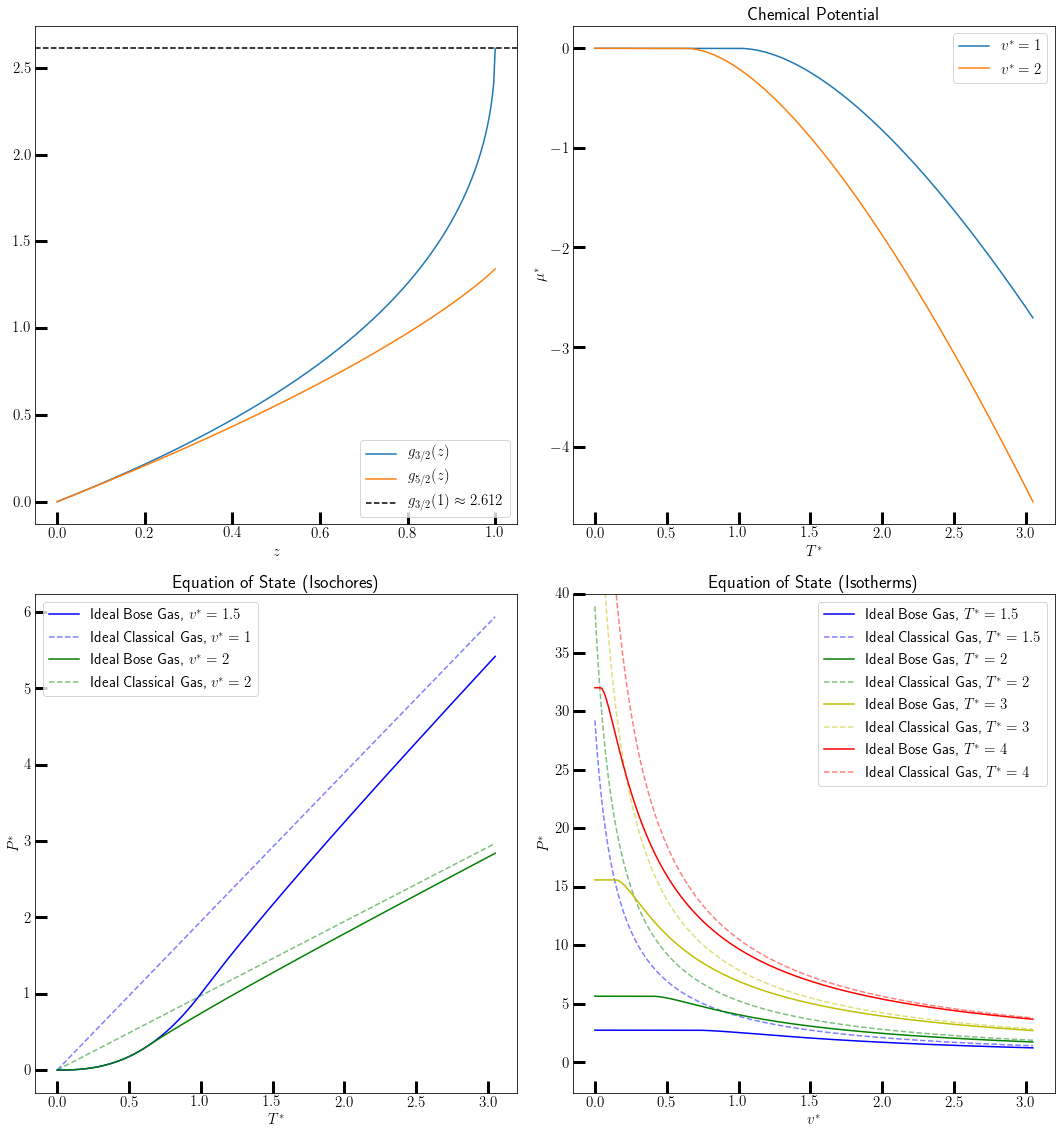

In [74]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Bitstream Vera Sans']})
rc('text', usetex=True)
fs = 15
plt.rcParams.update({'font.size': fs})
#Size of figure
plt.rcParams.update({'figure.figsize':(15,16)})
plt.rcParams.update({'figure.autolayout':True})

mu_bracket = (-1e3, 0)
lo, hi = mu_bracket

#You can adjust these
temps = np.linspace(0.0, 3.05, 300)
vols = np.linspace(0.1, 2.05, 300)
zeds = np.linspace(0.0, 1.0, 300)
    

fig, axs = plt.subplots(2, 2)

for ax in axs.flatten():
    ax.tick_params(direction='in', length=12, width=3)


axs[0,0].plot(zeds, plog(1.5, zeds), label=r"$g_{3/2}(z)$")
axs[0,0].plot(zeds, plog(2.5, zeds), label=r"$g_{5/2}(z)$")
axs[0,0].set_xlabel(r"$z$")
axs[0,0].axhline(y=const, color='black', label=r'$g_{3/2}(1)\approx%1.3lf$' % g_1p5, linestyle='--')
axs[0,0].legend()

axs[0,1].set_title("Chemical Potential")
axs[0,1].plot(temps, ChemPot(temps, 1.0),label=r"$v^\ast = 1$")
axs[0,1].plot(temps, ChemPot(temps, 2.0),label=r"$v^\ast = 2$")
axs[0,1].set_xlabel(r"$T^\ast$")
axs[0,1].set_ylabel(r"$\mu^\ast$")
axs[0,1].legend()


axs[1,0].set_title("Equation of State (Isochores)")
axs[1,0].plot(temps, BoseGas_P(temps, 1.0),'b-' ,label=r"Ideal Bose Gas, $v^\ast = 1.5$")
axs[1,0].plot(temps, temps * rat , 'b--', alpha=0.5, label=r"Ideal Classical Gas, $v^\ast = 1$")
axs[1,0].plot(temps, BoseGas_P(temps, 2.0), 'g-' ,label=r"Ideal Bose Gas, $v^\ast = 2$")
axs[1,0].plot(temps, temps * rat * (1./2.),'g--',alpha=0.5, label=r"Ideal Classical Gas, $v^\ast = 2$")
axs[1,0].set_xlabel(r"$T^\ast$")
axs[1,0].set_ylabel(r"$P^\ast$")
axs[1,0].legend()


axs[1,1].set_title("Equation of State (Isotherms)")
axs[1,1].plot(temps, BoseGas_P(1.5, vols),'b-' ,label=r"Ideal Bose Gas, $T^\ast = 1.5$")
axs[1,1].plot(temps,  1.5 * (rat/vols) , 'b--',alpha=0.5, label=r"Ideal Classical Gas, $T^\ast = 1.5$")
axs[1,1].plot(temps, BoseGas_P(2.0, vols), 'g-' ,label=r"Ideal Bose Gas, $T^\ast = 2$")
axs[1,1].plot(temps, 2.0 * (rat/vols),'g--',alpha=0.5, label=r"Ideal Classical Gas, $T^\ast = 2$")
axs[1,1].plot(temps, BoseGas_P(3.0, vols), 'y-' ,label=r"Ideal Bose Gas, $T^\ast = 3$")
axs[1,1].plot(temps, 3.0 * (rat/vols),'y--',alpha=0.5, label=r"Ideal Classical Gas, $T^\ast = 3$")
axs[1,1].plot(temps, BoseGas_P(4.0, vols), 'r-' ,label=r"Ideal Bose Gas, $T^\ast = 4$")
axs[1,1].plot(temps, 4.0 * (rat/vols),'r--',alpha=0.5, label=r"Ideal Classical Gas, $T^\ast = 4$")
axs[1,1].set_xlabel(r"$v^\ast$")
axs[1,1].set_ylabel(r"$P^\ast$")
axs[1,1].set_ylim([None,40.0])
axs[1,1].legend()

plt.show()

## Exercises:
* Run the code above by loading it into [Jupyter](https://jupyter.org/), clicking on the code cell and pressing 'Shift-Enter'. Adjust the temperature range with the 'temps' variable and make plots for smaller and larger temperature ranges. Note that, in the definition of 'ChemPot', we have forced it to return a value of $0$ under certain conditions. What will happen if you remove those restrictions? Why?

* Change the root finding algorithm from Ridders' method to the Newton-Raphson method (which is much faster than Ridders' method), and see what happens. See refs [4,6] for background. 

* Make suitable changes to the code and add plots for the specific heat as a function of temperature. Identify the critical point and the classical limit. See ref. [1] for details.